Imports

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy.linalg import norm
import time

useful Functions

In [ ]:
def matrix_multiplier(matrix_1,matrix_2):
  res = np.array([[0 for x in range(len(matrix_2[0]))] for y in range(len(matrix_1))])
  for i in range(len(matrix_1)):
    for j in range(len(matrix_2[0])):
      for k in range(len(matrix_1[0])):
        res[i][j] += matrix_1[i][k] * matrix_2[k][j]
  return res

def transpose(A):
  transpose = np.array([[0 for x in range(len(A))] for y in range(len(A[0]))])
  for i in range(len(A[0])):
    for j in range(len(A)):
      transpose[i][j] = A[j][i]
  return transpose


Question 1 - x data matrix generation


In [ ]:
#no_of_samp=ns,feature_dim=fd

def data_matrix_gen(fd,ns):
  x=np.random.uniform(0,100,size=(fd-1,ns))
  x_0=np.ones((1,ns))
  x=np.vstack((x_0,x))
  return x

x = data_matrix_gen(3,50)
print(x)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.        ]
 [14.34517915  2.92050844 20.24144717 72.62449352 11.03869698 93.46586366
  65.29902501 70.97912138 49.09907699 66.21870509 52.92815849 90.85743942
  49.08294376 38.40996021 20.53505354 41.78865494 33.11584355  2.91971596
  29.24143564 87.57545386  3.16309998 83.12888191 16.13766696  6.36816155
  56.46314045 50.2658626  73.04092784 84.68920628 15.12287543 82.31696136
  93.18065804 65.31785669 95.75892189 13.54146896 99.79937924 57.95738693
 

Question 2 - t data matrix generation

In [ ]:
def dependent_var_gen(data_matrix_x,w,bias,noise_var):
  [n,m]=[len(data_matrix_x),len(data_matrix_x[0])] # calculating length of given matrix
  weight_vec = np.insert(w,0,bias,axis = 0) # inserting an elemnt in weigth vectro
  t_0=np.matmul(np.transpose(weight_vec),data_matrix_x) # matrix multiplication and transpose from numpy library
  t=np.add(t_0,bias,noise_var)
  return t

[n,m]=[len(x),len(x[0])]
bias = np.array(0.1)
actual_weight = np.random.uniform(0,10,size=(n-1,1)) # making a weigth vector from random function
noise_var = np.random.normal(0,1.3,size=(1,m)) # adding gaussian matrix
t=dependent_var_gen(x,actual_weight,bias,noise_var)
print(t)

[[620.15436603 598.93220148 564.24423737 627.87807557 227.98873369
  811.73800441 561.52102854 450.86155953 347.93495855 538.240208
  655.59643051 210.78184906 618.05399586 577.21916189 652.84226518
  575.27222462 104.45836249 573.1029907  394.39006902 832.88029957
    8.61080812 335.79770124 513.02881995 628.12307849 454.4474639
  221.18087274 491.89760545 759.56364079 472.84503881 543.72891433
  730.1717916  620.94683492 685.69749041  53.64842169 765.58597822
  248.23763807 473.19385902 757.46394827 138.37762369 382.61449779
  606.77505249 606.284088   320.47966641 372.05819679 122.56140705
  250.36476183 377.95978223 155.88552868 680.98379144 176.71712525]]


Question 3 - linear regression estimate

In [ ]:
def lin_reg_est(data_matrix_x,weight):
  y=np.matmul(np.transpose(weight),data_matrix_x)
  return y

n=len(x)
weight = np.random.uniform(0,10,size=(n,1))
y_1= lin_reg_est(x,weight)
print(y_1)

[[735.8476601  730.95330367 657.09223636 638.60071283 265.16422372
  823.97439953 571.3379568  426.42241302 341.33527727 541.35400851
  708.33558969  98.19893349 669.73314569 639.62138763 764.25859465
  631.07246057  74.59985322 699.55565139 434.14251129 860.4538267
   12.88928405 264.31487501 602.34143356 760.13067007 457.34212096
  185.11262628 472.53502199 776.60802902 555.34910519 518.57062991
  725.34084752 643.54407222 666.55840673  48.64919141 756.28129482
  203.93047692 449.62808197 801.75113356 159.9803312  385.80432078
  677.08803834 707.50814225 299.15234414 429.84020454  86.06322542
  238.71710902 298.19896221 137.81828401 753.52629563 181.39898808]]


Question 4 - Mean square error computation

In [ ]:
def MSE(y,t):
  mse = np.square(np.subtract(y,t)).mean(axis=None)
  return mse

Mean_square_error = MSE(y_1,t)
print(Mean_square_error)

3538.7546391236906


Question 5 - weights of linear regression using pseudo inverse l2 regularization

In [ ]:
def pseudo_inv_weight_est(data_matrix_x,t,lamda):
  [n,m]=[len((data_matrix_x)),len((data_matrix_x[0]))]
  sum = 0
  o_1 = np.matmul(data_matrix_x,np.transpose(t))
  o_2 = np.linalg.inv(np.add(np.matmul(data_matrix_x,np.transpose(data_matrix_x)),np.identity(len(data_matrix_x))*lamda)) # using inverse function
  weight_est = np.matmul(o_2,o_1)
  o_3 = np.matmul(np.transpose(weight_est),data_matrix_x)
  o_4 = np.matmul(np.transpose(weight_est),weight_est)*lamda/2
  mse_1 = MSE(o_3,t) + o_4
  y = np.matmul(np.transpose(weight_est),data_matrix_x)
  return weight_est,mse_1,y

[weight_estimated,mse,y] = pseudo_inv_weight_est(x,t,0.01)
print('weight_estimated = ', np.transpose(weight_estimated))
print('Mean square error = ',mse)
print('Actual t values = ',t)
print('Estimated y = ',y)

#plt.scatter(x,t)
#plt.scatter(x,y)
#plt.show()
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter(x[0][:], x[1][:], t[0][:])
#ax.scatter(x[0][:], x[1][:], y[0][:])
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z');

weight_estimated =  [[0.19983056 2.10890311 6.55114882]]
Mean square error =  [[0.23702478]]
Actual t values =  [[620.15436603 598.93220148 564.24423737 627.87807557 227.98873369
  811.73800441 561.52102854 450.86155953 347.93495855 538.240208
  655.59643051 210.78184906 618.05399586 577.21916189 652.84226518
  575.27222462 104.45836249 573.1029907  394.39006902 832.88029957
    8.61080812 335.79770124 513.02881995 628.12307849 454.4474639
  221.18087274 491.89760545 759.56364079 472.84503881 543.72891433
  730.1717916  620.94683492 685.69749041  53.64842169 765.58597822
  248.23763807 473.19385902 757.46394827 138.37762369 382.61449779
  606.77505249 606.284088   320.47966641 372.05819679 122.56140705
  250.36476183 377.95978223 155.88552868 680.98379144 176.71712525]]
Estimated y =  [[620.15429826 598.93211486 564.24417052 627.87809068 227.98860971
  811.73807297 561.52102464 450.86154906 347.93490381 538.24020233
  655.59642159 210.78183495 618.05397661 577.21912228 652.8422104
  57

Question 6 - Gradient of MSE

In [ ]:
def grad_mse(data_matrix_x,t,w):
  y = np.matmul(np.transpose(w),data_matrix_x)
  o_2 = np.subtract(t,y)
  grad = np.matmul(o_2,np.transpose(data_matrix_x))/len(t)
  return grad

grad_vec = grad_mse(x,t,weight_estimated)
print(grad_vec)

[[0.00199831 0.02108903 0.06551149]]


Queston 7 - L2 norm of vector w

In [ ]:
def l2_norm(w):
  exclude_w0=w[1:]
  l2=norm(exclude_w0)
  return l2,exclude_w0


l2=l2_norm(weight_estimated)[0]
print('l2 norm of w excluding w0 = ',l2)

l2 norm of w excluding w0 =  6.882225165012797


Question 8 - gradient of L2 norm of w

In [ ]:
def grad_l2(w):
  grad_l2_norm_w = l2_norm(w)[1]/l2_norm(w)[0]
  grad_l2_norm_w=np.vstack((np.zeros((1,1)),grad_l2_norm_w))
  return grad_l2_norm_w

print(grad_l2(weight_estimated))

[[0.        ]
 [0.30642751]
 [0.951894  ]]


Question 9 - L1 norm of vector w

In [ ]:
def l1_norm(w):
  exclude_w0=w[1:]
  l2=norm(exclude_w0,1)
  return l2,exclude_w0

print('l1 norm of w excluding w0 = ',l1_norm(weight_estimated)[0])

l1 norm of w excluding w0 =  8.66005193292554


Question 10 - gradient of L1 norm wrt w

In [ ]:
def grad_l1(w):
  grad_l1_norm = np.zeros((1,len(w)))
  grad_l1_norm = np.sign(w)
  grad_l1_norm[0,0] = 0
  return grad_l1_norm

print(grad_l1(weight_estimated))

[[0.]
 [1.]
 [1.]]


In [ ]:
y=np.matmul(np.transpose(weight_estimated),x)
print('t=',t)
MSE(y,t)

t= [[ 884.66073058  635.5571346   515.47117491  920.0625786  1022.63152531
   265.06879261  310.29058971  481.78490191  472.56505402  498.75141291
   891.75925274 1046.58269328  826.51482289  283.95975915  313.59580337
   328.77776605  929.29955126 1017.72238873 1042.68012174  349.03824139
   622.51755047  141.9791119   685.06699205  587.65334667  938.9181343
  1120.05504931  902.69409935  285.93647568  937.77040927  230.21685821
   612.20841362 1054.60061393  726.47486925  875.86661242 1121.72797123
   343.93583904  208.74843722  568.96149434 1022.41395384  989.97363253
   830.72090323  909.77433972  704.90450205  172.98989988  689.97941438
   269.61029672  503.74710189  836.65268129  503.31115924  619.96502672]]


3.211315615136631e-09

Question 11 - updated weight and mse using gradient descent

In [ ]:
def mse_norms(data_matrix_x,t,w,lamda_1,lamda_2):
  y=np.matmul(np.transpose(w),data_matrix_x)
  o_1=lamda_1*np.absolute(w) # calculating obsolute value
  o_1=norm(o_1,1)
  o_2=lamda_2*np.matmul(np.transpose(w),w)/2
  mse_norm=MSE(y,t)+o_1+o_2
  return mse_norm

def grad_mse_norms(data_matrix_x,t,w,lamda1,lamda2):
  o_3 = np.transpose(lamda2*w)
  o_4 = np.transpose(lamda1*grad_l1(w)/2)
  o_5 = grad_mse(data_matrix_x,t,w)
  grad = np.add(o_5,o_3,o_4)
  return grad

def grad_desc_once(data_matrix_x,t,w,eta,lamda1,lamda2):
  w1 = w
  i=0
  g = grad_mse_norms(data_matrix_x,t,w1,lamda1,lamda2)
  diff = eta*g
  w1 += np.transpose(diff)
  g = grad_mse_norms(data_matrix_x,t,w1,lamda1,lamda2)
  print('mse = ',mse_norms(data_matrix_x,t,w1,lamda1,lamda2))
  print('w1 = ',w1)
  print('grad mse = ',g)
  return w1

grad_desc_once(x,t,weight_estimated,0.000002,0.001,0.001)

mse =  [[0.03256237]]
w1 =  [[0.19983057]
 [2.10890316]
 [6.55114897]]
grad mse =  [[ 0.00168115 -0.00432738  0.03622527]]


array([[0.19983057],
       [2.10890316],
       [6.55114897]])

Function tester

In [ ]:
len(x)

3

Question 12 - gradient descent complete 

In [14]:
def grad_mse_norms(data_matrix_x,t,w,lamda1,lamda2):
  o_3 = np.transpose(lamda2*w)
  o_4 = np.transpose(lamda1*grad_l1(w)/2)
  o_5 = grad_mse(data_matrix_x,t,w)
  grad = np.add(o_5,o_3,o_4)
  return grad

def grad_desc(data_matrix_x,t,eta,lamda1,lamda2,min_rmse,max_iter):
  w1 = np.zeros((len(data_matrix_x),1))
  i=0
  #min_rmse_arr=[min_rmse for i in range(len(w)) ]
  g = grad_mse_norms(data_matrix_x,t,w1,lamda1,lamda2)
  rmse = np.sqrt(mse_norms(data_matrix_x,t,w1,lamda1,lamda2))
  while rmse >= min_rmse and i <= max_iter: # while loop running
    i += 1
    diff = eta*g
    w1 += np.transpose(diff)
    rmse = np.sqrt(mse_norms(data_matrix_x,t,w1,lamda1,lamda2)) # rmse computing
    g = grad_mse_norms(data_matrix_x,t,w1,lamda1,lamda2)
    #print('w1 = ',w1)
    #print('rmse = ',rmse)
    #print('grad mse = ',grad_mse_norms(data_matrix_x,t,w1,lamda1,lamda2))
  return w1

grad_desc(x,t,0.000002,0.000,0.000,0.0001,100000)


array([[0.17168158],
       [2.10911857],
       [6.55138968]])

Question 13 - Running  Experiments part a

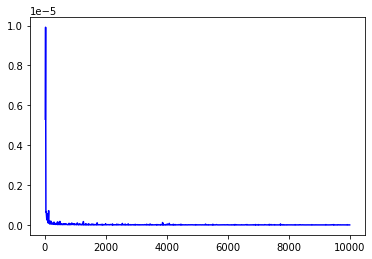

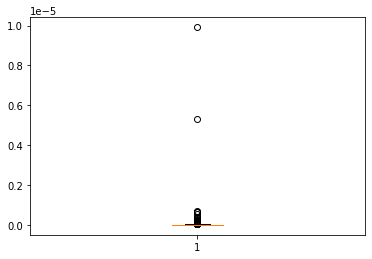

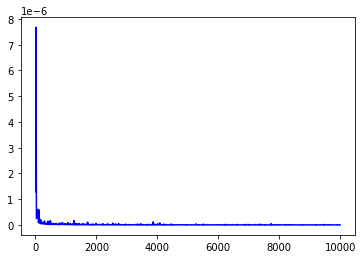

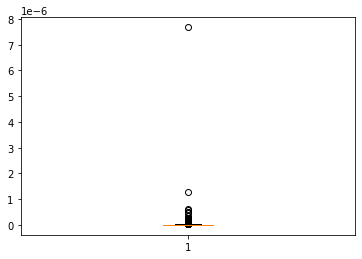

In [48]:
total_set_x = data_matrix_gen(3,10003)
rmse_vec_v = []
rmse_vec_t = []
for num in range(10,10001,10):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:int(0.8*num)]
  training_set_t = total_set_t[:,0:int(0.8*num)]
  validation_set_x = total_set_x[:,int(0.8*num)+1:num+1]
  validation_set_t = total_set_t[:,int(0.8*num)+1:num+1]
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = range(10,10001,10)
  rmse_vec_v.append(validation_set_nrmse.item())
  rmse_vec_t.append(training_set_nrmse.item())
plt.plot(num_matr,rmse_vec_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_v)
plt.show()

plt.plot(num_matr,rmse_vec_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_t) # box plot function
plt.show()


  Question 13 - part b

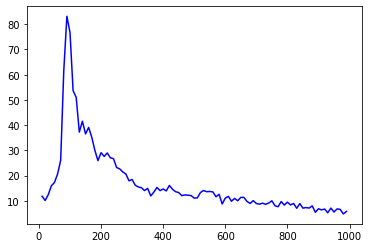

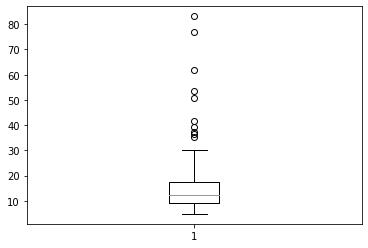

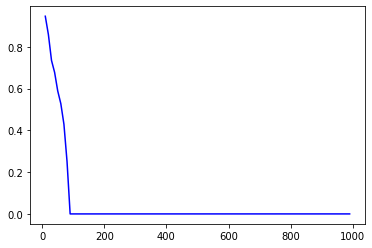

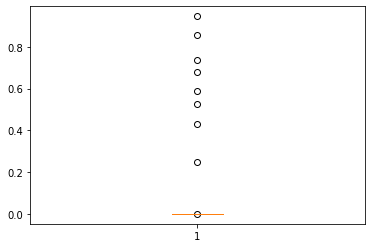

In [50]:
total_set_x = data_matrix_gen(1000,100)
rmse_vec_1_v = []
rmse_vec_1_t = []
for num in range(10,1000,10):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[0:num,0:80]
  training_set_t = total_set_t[0:num,0:80]
  validation_set_x = total_set_x[0:num,80:]
  validation_set_t = total_set_t[0:num,80:]
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.mean(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = range(10,1000,10)
  rmse_vec_1_v.append(validation_set_nrmse.item())
  rmse_vec_1_t.append(training_set_nrmse.item())

plt.plot(num_matr,rmse_vec_1_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_1_v)
plt.show()


plt.plot(num_matr,rmse_vec_1_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_1_t)
plt.show()


Question 13 - part c

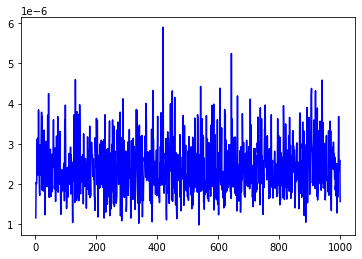

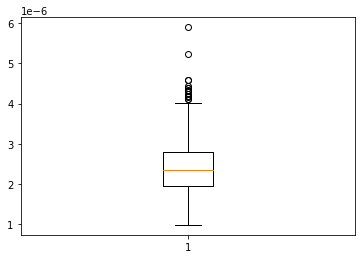

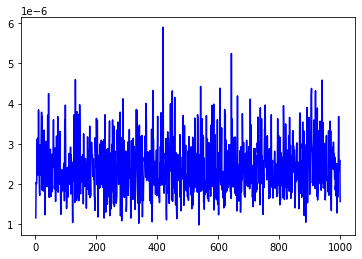

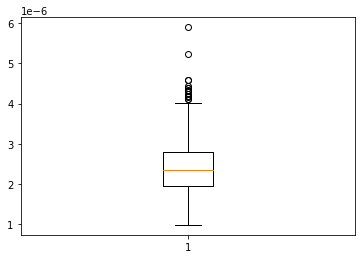

In [52]:
total_set_x = data_matrix_gen(10,100)
rmse_vec_2_v = []
rmse_vec_2_t = []
for num in np.linspace(1,1000,1000):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,np.sqrt(num),size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:80]
  training_set_t = total_set_t[:,0:80]
  validation_set_x = total_set_x[:,80:]
  validation_set_t = total_set_t[:,80:]
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights) # computing y
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.mean(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = np.linspace(1,1000,1000)
  rmse_vec_2_v.append(validation_set_nrmse.item())
  rmse_vec_2_t.append(validation_set_nrmse.item())

plt.plot(num_matr,rmse_vec_2_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_2_v)
plt.show()

plt.plot(num_matr,rmse_vec_2_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_2_t)
plt.show()

Question 13 - part d

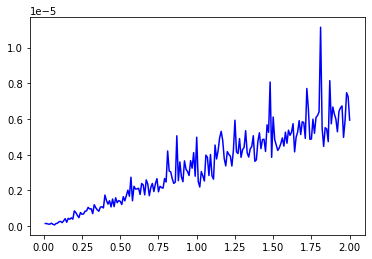

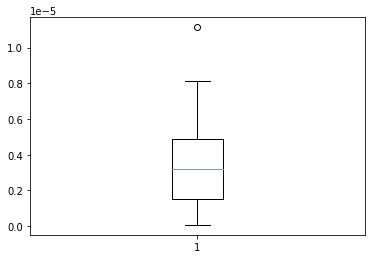

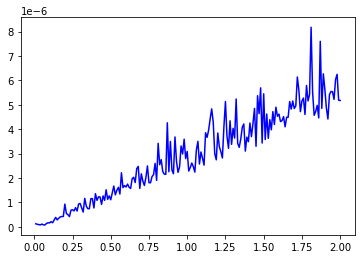

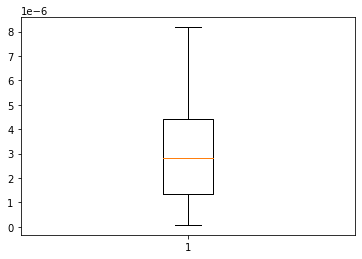

In [54]:
total_set_x = data_matrix_gen(10,100)
rmse_vec_3_v = []
rmse_vec_3_t = []
for num in np.linspace(0.01,2,200):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(num)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:80]
  training_set_t = total_set_t[:,0:80]
  validation_set_x = total_set_x[:,80:]
  validation_set_t = total_set_t[:,80:]
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = np.linspace(0.01,2,200)
  rmse_vec_3_v.append(validation_set_nrmse.item())
  rmse_vec_3_t.append(training_set_nrmse.item())

plt.plot(num_matr,rmse_vec_3_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_3_v)
plt.show()

plt.plot(num_matr,rmse_vec_3_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_3_t)
plt.show()

Question 13 - part e

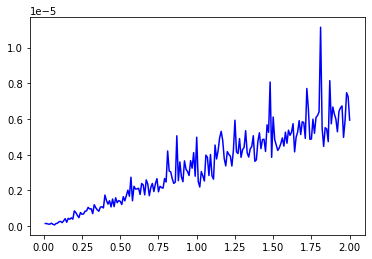

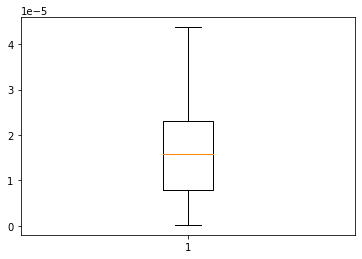

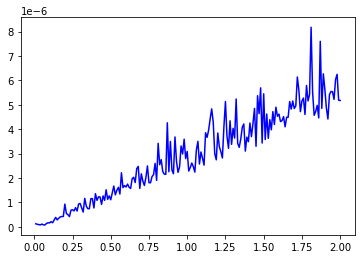

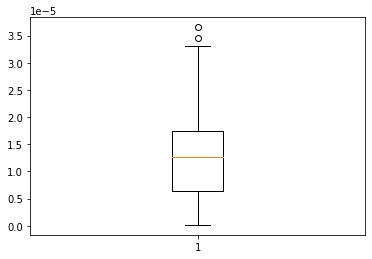

In [56]:
total_set_x = data_matrix_gen(10,100)
rmse_vec_4_v = []
rmse_vec_4_t = []
for num in np.linspace(0.01,2,200):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:80]
  training_set_t = total_set_t[:,0:80]
  validation_set_x = total_set_x[:,80:]
  validation_set_t = total_set_t[:,80:]
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,num)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = np.linspace(0.01,2,200)
  rmse_vec_4_v.append(validation_set_nrmse.item())
  rmse_vec_4_t.append(training_set_nrmse.item())

plt.plot(num_matr,rmse_vec_3_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_4_v)
plt.show()

plt.plot(num_matr,rmse_vec_3_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_4_t)
plt.show()

Question 13 - part f

time taken : 0.0004134178161621094
time taken : 0.0006704330444335938
time taken : 0.0013816356658935547
time taken : 0.001991748809814453
time taken : 0.003460407257080078
time taken : 0.005708932876586914
time taken : 0.008281230926513672
time taken : 0.012529134750366211
time taken : 0.018686532974243164
time taken : 0.02123856544494629
time taken : 0.029042959213256836
time taken : 0.03394579887390137
time taken : 0.04386544227600098
time taken : 0.05678415298461914
time taken : 0.0643310546875
time taken : 0.07230424880981445
time taken : 0.1180574893951416
time taken : 0.09921741485595703
time taken : 0.12274432182312012
time taken : 0.1330583095550537
time taken : 0.19086670875549316
time taken : 0.18929314613342285
time taken : 0.2268209457397461
time taken : 0.21941876411437988
time taken : 0.26409363746643066
time taken : 0.280590295791626
time taken : 0.3847651481628418
time taken : 0.34833359718322754
time taken : 0.6307716369628906
time taken : 0.4145503044128418
time take

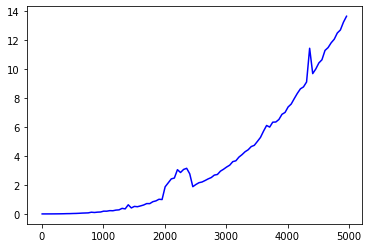

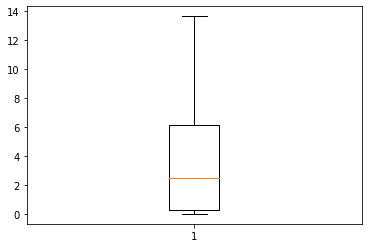

In [41]:
total_set_x = data_matrix_gen(5003,5003)
time_vec = []
for num in range(10,5001,50):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:num,0:int(0.8*num)]
  training_set_t = total_set_t[:num,0:int(0.8*num)]
  validation_set_x = total_set_x[:num,int(0.8*num)+1:num+1]
  validation_set_t = total_set_t[:num,int(0.8*num)+1:num+1]
  start = time.time()
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  end = time.time()
  print('time taken :',end - start)
  time_vec.append(end-start)

num_matr = range(10,5001,50)

plt.plot(num_matr,time_vec,c='blue')
plt.show()
plt.boxplot(time_vec)
plt.show()

#breaking point is around 50000X50000 matrix inverse 

Question 13 - part g

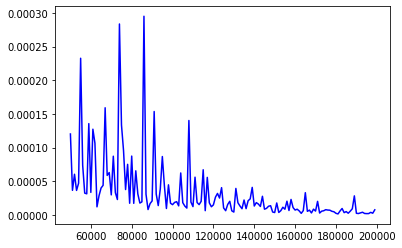

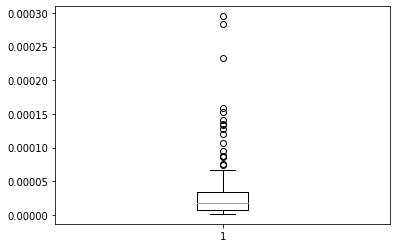

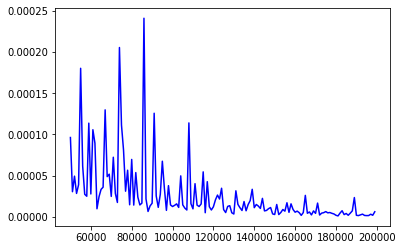

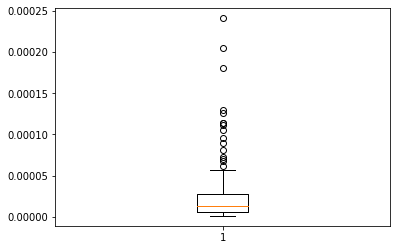

In [25]:
total_set_x = data_matrix_gen(4,100)
rmse_vec_5_v = []
rmse_vec_5_t = []
for num in range(50000,200000,1000):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:80]
  training_set_t = total_set_t[:,0:80]
  validation_set_x = total_set_x[:,80:]
  validation_set_t = total_set_t[:,80:]
  training_set_weights = grad_desc(training_set_x,training_set_t,0.000002,0,0,0.0001,num)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = range(50000,200000,1000)
  rmse_vec_5_v.append(validation_set_nrmse.item())
  rmse_vec_5_t.append(training_set_nrmse.item())

plt.plot(num_matr,rmse_vec_5_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_5_v)
plt.show()

plt.plot(num_matr,rmse_vec_5_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_5_t)
plt.show()

Question 13 - part h

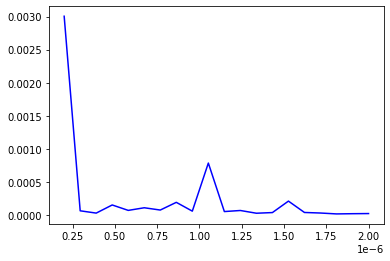

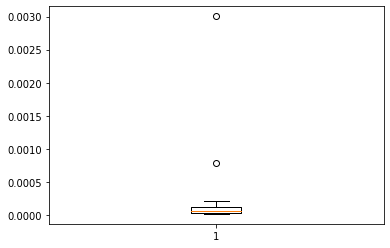

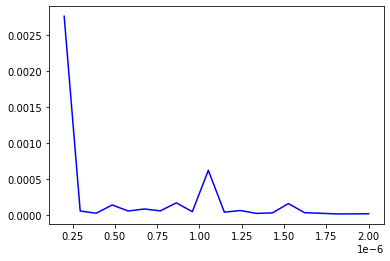

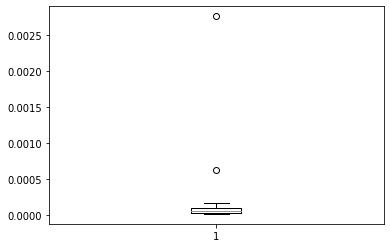

In [24]:
total_set_x = data_matrix_gen(3,100)
rmse_vec_6_v = []
rmse_vec_6_t = []
for num in np.linspace(0.0000002,0.000002,20):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:80]
  training_set_t = total_set_t[:,0:80]
  validation_set_x = total_set_x[:,80:]
  validation_set_t = total_set_t[:,80:]
  training_set_weights = grad_desc(training_set_x,training_set_t,num,0,0,0.0001,100000)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = np.linspace(0.0000002,0.000002,20)
  rmse_vec_6_v.append(validation_set_nrmse.item())
  rmse_vec_6_t.append(training_set_nrmse.item())

plt.plot(num_matr,rmse_vec_6_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_6_v)
plt.show()

plt.plot(num_matr,rmse_vec_6_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_6_t)
plt.show()

Question 13 - part i

time taken : 6.05636191368103
time taken : 6.542569398880005
time taken : 7.311258792877197
time taken : 6.70723557472229
time taken : 6.732479572296143
time taken : 6.813014507293701
time taken : 6.977299451828003
time taken : 7.123100757598877
time taken : 7.123779058456421
time taken : 7.216562986373901


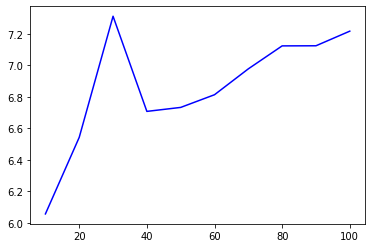

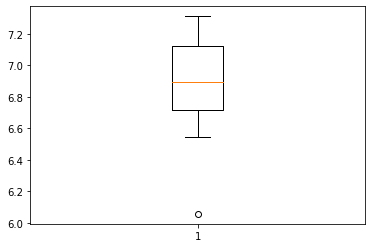

In [45]:
total_set_x = data_matrix_gen(103,103)
rmse_vec_v_11 = []
rmse_vec_t_11 = []
time_vec = []
for num in range(10,101,10):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:num,0:int(0.8*num)]
  training_set_t = total_set_t[:num,0:int(0.8*num)]
  validation_set_x = total_set_x[:num,int(0.8*num)+1:num+1]
  validation_set_t = total_set_t[:num,int(0.8*num)+1:num+1]
  start = time.time()
  training_set_weights= grad_desc(training_set_x,training_set_t,0.00000001,0,0,0.0001,100000)
  end = time.time()
  print('time taken :',end - start)
  num_matr = range(10,101,10)
  time_vec.append(end-start)

plt.plot(num_matr,time_vec,c='blue')
plt.show()
plt.boxplot(time_vec)
plt.show()

# breaking point is 100X100 matrix 

Question 13 - part j

time taken : 7.511996030807495
time taken : 6.625309944152832
time taken : 6.68586277961731
time taken : 6.768351078033447
time taken : 6.670472621917725
time taken : 6.28917932510376
time taken : 4.578018426895142
time taken : 4.570692300796509
time taken : 3.521027088165283
time taken : 2.894023895263672
time taken : 2.5394856929779053
time taken : 2.1328487396240234
time taken : 3.151489019393921
time taken : 3.1621580123901367
time taken : 2.7574265003204346
time taken : 2.056619167327881
time taken : 1.9971861839294434
time taken : 1.9027810096740723
time taken : 1.7844913005828857
time taken : 1.8013949394226074
time taken : 1.6288540363311768
time taken : 1.5732898712158203
time taken : 1.3537609577178955
time taken : 1.4427380561828613
time taken : 1.265411615371704
time taken : 1.3752882480621338
time taken : 1.0225236415863037
time taken : 1.1216249465942383
time taken : 1.183105230331421
time taken : 0.9699752330780029
time taken : 0.9499168395996094
time taken : 0.997273921

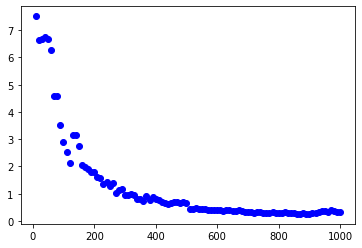

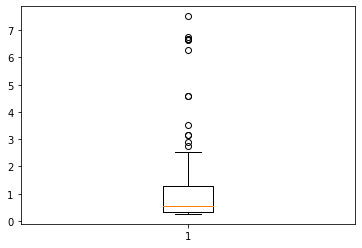

In [43]:
total_set_x = data_matrix_gen(1003,10)
time_vec_2 = []
for num in range(10,1001,10):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:num,:799]
  training_set_t = total_set_t[:num,:799]
  validation_set_x = total_set_x[:num,800:1000]
  validation_set_t = total_set_t[:num,800:1000]
  start = time.time()
  training_set_weights= grad_desc(training_set_x,training_set_t,0.00000001,0,0,0.0001,100000)
  end = time.time()
  print('time taken :',end - start)
  num_matr = range(10,1001,10)
  time_vec_2.append(end-start)

plt.scatter(num_matr,time_vec_2,c='blue')
plt.show()
plt.boxplot(time_vec_2)
plt.show()

#breaking point is 200X10 matrix

Question 13 - part k

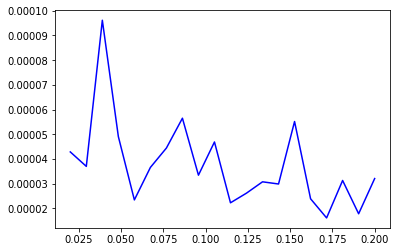

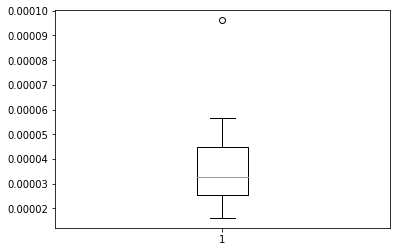

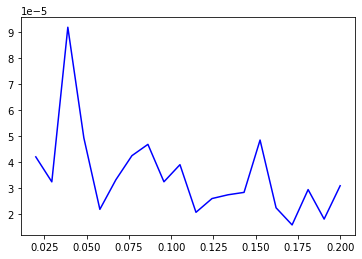

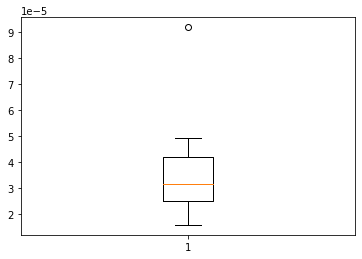

[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


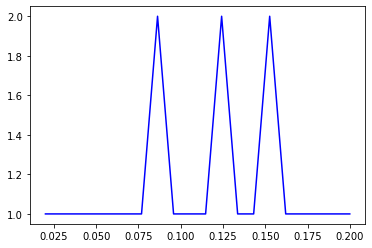

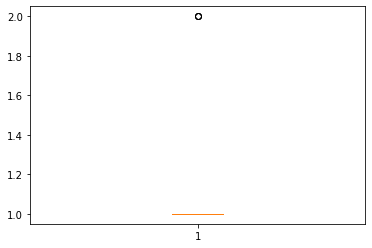

In [27]:
total_set_x = data_matrix_gen(5,100)
rmse_vec_7_v = []
rmse_vec_7_t = []
near_zero_vec = []
for num in np.linspace(0.2,2,20):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:80]
  training_set_t = total_set_t[:,0:80]
  validation_set_x = total_set_x[:,80:]
  validation_set_t = total_set_t[:,80:]
  training_set_weights = grad_desc(training_set_x,training_set_t,0.000002,0,num,0.0001,100000)
  near_zero = 0 
  for z in training_set_weights:
    if z<0.2:
      near_zero += 1
  near_zero_vec.append(near_zero)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = np.linspace(0.2,2,20)
  rmse_vec_7_v.append(validation_set_nrmse.item())
  rmse_vec_7_t.append(training_set_nrmse.item())

plt.plot(num_matr,rmse_vec_7_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_7_v)
plt.show()

plt.plot(num_matr,rmse_vec_7_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_7_t)
plt.show()

print(near_zero_vec)
plt.plot(num_matr,near_zero_vec,c='blue')
plt.show()
plt.boxplot(near_zero_vec)
plt.show()

Question 13 - part L

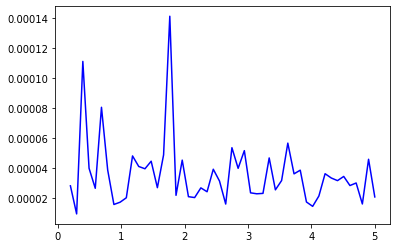

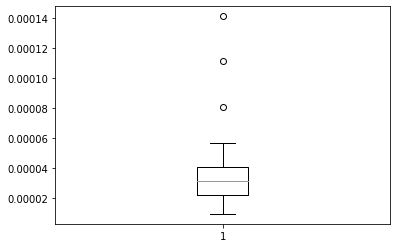

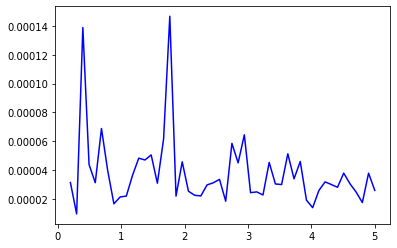

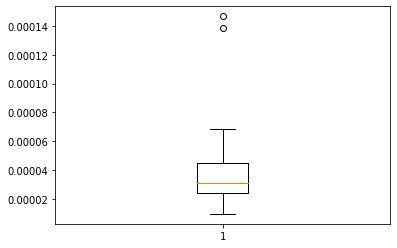

[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


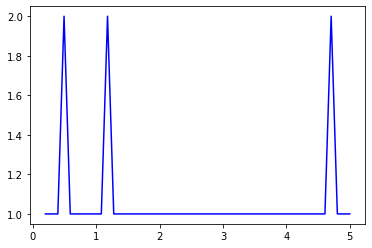

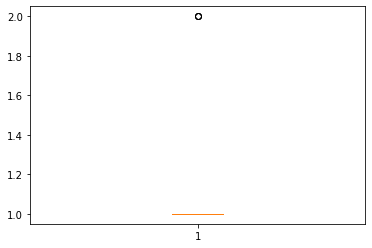

In [46]:
total_set_x = data_matrix_gen(5,100)
rmse_vec_8_v = []
rmse_vec_8_t = []
near_zero_vec_1 = []
for num in np.linspace(0.2,5,50):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:80]
  training_set_t = total_set_t[:,0:80]
  validation_set_x = total_set_x[:,80:]
  validation_set_t = total_set_t[:,80:]
  training_set_weights = grad_desc(training_set_x,training_set_t,0.000002,num,0,0.0001,100000)
  near_zero = 0 
  for z in training_set_weights:
    if z<0.2:
      near_zero += 1
  near_zero_vec_1.append(near_zero)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = np.linspace(0.2,5,50)
  rmse_vec_8_v.append(validation_set_nrmse.item())
  rmse_vec_8_t.append(training_set_nrmse.item())

plt.plot(num_matr,rmse_vec_8_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_8_v)
plt.show()

plt.plot(num_matr,rmse_vec_8_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_8_t)
plt.show()

print(near_zero_vec_1)
plt.plot(num_matr,near_zero_vec_1,c='blue')
plt.show()
plt.boxplot(near_zero_vec_1)
plt.show()

Question 13 - part  m

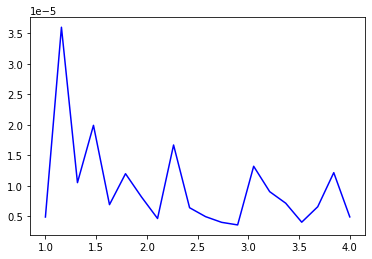

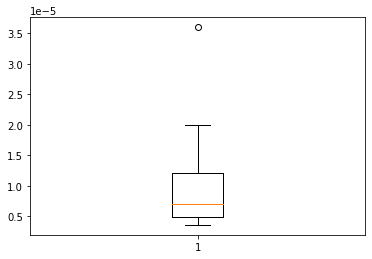

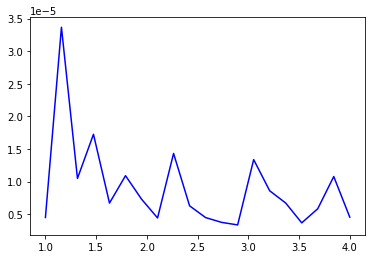

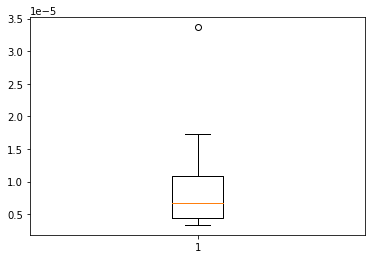

In [30]:
total_set_x = data_matrix_gen(4,100)
rmse_vec_9_v = []
rmse_vec_9_t = []
for num in np.linspace(1,4,20):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,np.sqrt(num),size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:80]
  training_set_t = total_set_t[:,0:80]
  validation_set_x = total_set_x[:,80:]
  validation_set_t = total_set_t[:,80:]
  training_set_weights = grad_desc(training_set_x,training_set_t,0.000002,0,0.173,0.0001,150000)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = np.linspace(1,4,20)
  rmse_vec_9_v.append(validation_set_nrmse.item())
  rmse_vec_9_t.append(training_set_nrmse.item())

plt.plot(num_matr,rmse_vec_9_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_9_v)
plt.show()

plt.plot(num_matr,rmse_vec_9_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_9_t)
plt.show()


Question 13 - part n

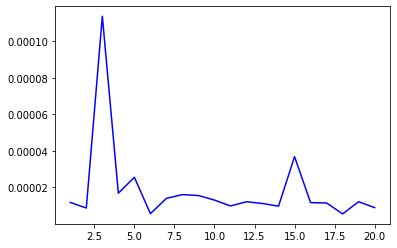

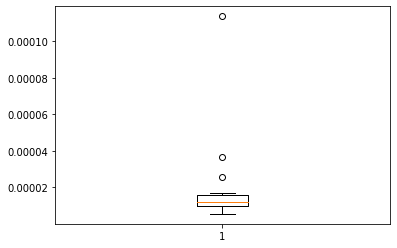

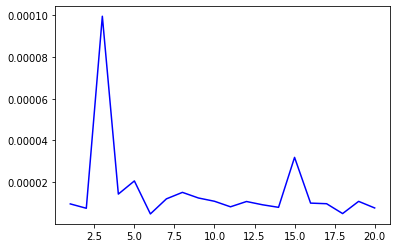

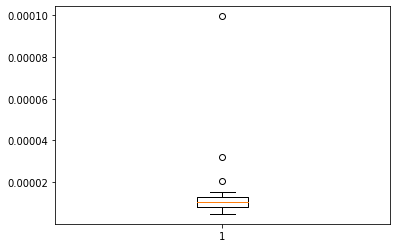

In [32]:
total_set_x = data_matrix_gen(4,100)
rmse_vec_10_v = []
rmse_vec_10_t = []
for num in np.linspace(1,20,20):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,np.sqrt(num),size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:,0:80]
  training_set_t = total_set_t[:,0:80]
  validation_set_x = total_set_x[:,80:]
  validation_set_t = total_set_t[:,80:]
  training_set_weights = grad_desc(training_set_x,training_set_t,0.000002,0.75,0,0.0001,150000)
  validation_set_y = lin_reg_est(validation_set_x,training_set_weights)
  validation_set_nrmse = np.sqrt(mse_norms(validation_set_x,validation_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(validation_set_t))
  training_set_nrmse = np.sqrt(mse_norms(training_set_x,training_set_t,training_set_weights,0.00,0.00))/np.sqrt(np.var(training_set_t))
  #print('min num = ',int(0.8*num))
  #print('max num = ',num)
  #print('training set = ',training_set_x)
  num_matr = np.linspace(1,20,20)
  rmse_vec_10_v.append(validation_set_nrmse.item())
  rmse_vec_10_t.append(training_set_nrmse.item())

plt.plot(num_matr,rmse_vec_10_v,c='blue')
plt.show()
plt.boxplot(rmse_vec_10_v)
plt.show()

plt.plot(num_matr,rmse_vec_10_t,c='blue')
plt.show()
plt.boxplot(rmse_vec_10_t)
plt.show()

Question 13 - part o

time taken : 0.00039267539978027344
time taken : 0.0006854534149169922
time taken : 0.0012612342834472656
time taken : 0.0023567676544189453
time taken : 0.005185604095458984
time taken : 0.006058216094970703
time taken : 0.01581740379333496
time taken : 0.013792991638183594
time taken : 0.016246318817138672
time taken : 0.021331787109375
time taken : 0.029569149017333984
time taken : 0.03946042060852051
time taken : 0.05344200134277344
time taken : 0.05142855644226074
time taken : 0.07209658622741699
time taken : 0.07752132415771484
time taken : 0.09303879737854004
time taken : 0.12514257431030273
time taken : 0.12415432929992676
time taken : 0.12895894050598145
time taken : 0.00025200843811035156
time taken : 0.00042438507080078125
time taken : 0.0009236335754394531
time taken : 0.001794576644897461
time taken : 0.0033583641052246094
time taken : 0.007956743240356445
time taken : 0.008645296096801758
time taken : 0.010674476623535156
time taken : 0.01596975326538086
time taken : 0.02

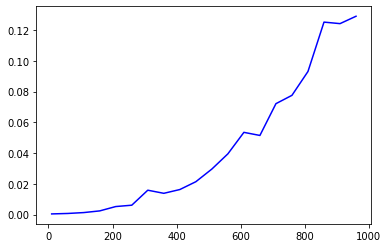

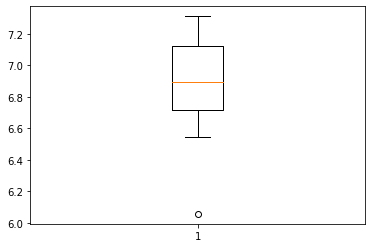

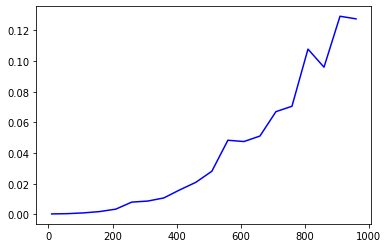

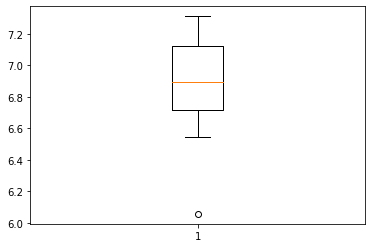

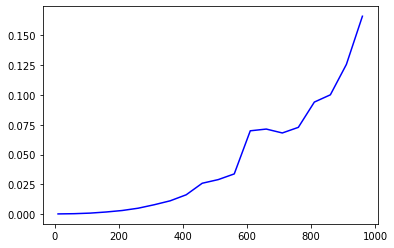

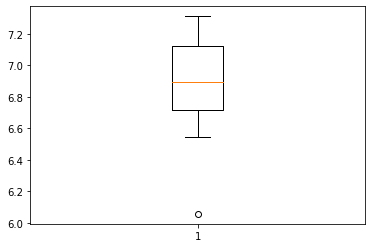

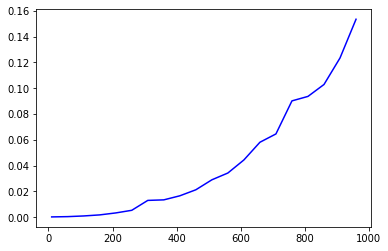

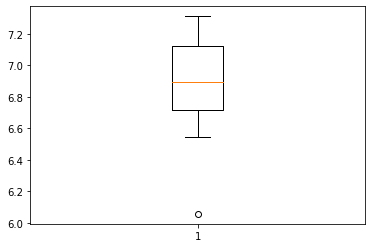

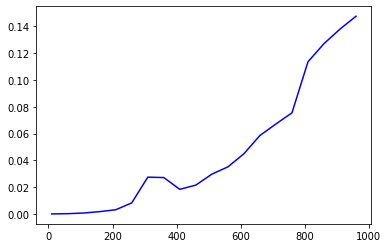

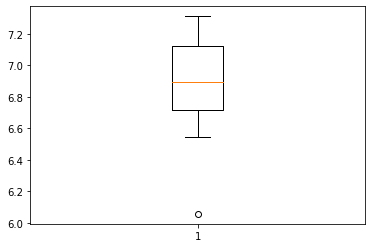

In [47]:
total_set_x = data_matrix_gen(1003,1003)
time_vec_50 = []
time_vec_60 = []
time_vec_70 = []
time_vec_80 = []
time_vec_90 = []
for num in range(10,1001,50):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:num,0:int(0.5*num)]
  training_set_t = total_set_t[:num,0:int(0.5*num)]
  validation_set_x = total_set_x[:num,int(0.5*num)+1:]
  validation_set_t = total_set_t[:num,int(0.5*num)+1:]
  start = time.time()
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  end = time.time()
  print('time taken :',end - start)
  time_vec_50.append(end-start)

for num in range(10,1001,50):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:num,0:int(0.6*num)]
  training_set_t = total_set_t[:num,0:int(0.6*num)]
  validation_set_x = total_set_x[:num,int(0.6*num)+1:]
  validation_set_t = total_set_t[:num,int(0.6*num)+1:]
  start = time.time()
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  end = time.time()
  print('time taken :',end - start)
  time_vec_60.append(end-start)

for num in range(10,1001,50):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:num,0:int(0.7*num)]
  training_set_t = total_set_t[:num,0:int(0.7*num)]
  validation_set_x = total_set_x[:num,int(0.7*num)+1:]
  validation_set_t = total_set_t[:num,int(0.7*num)+1:]
  start = time.time()
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  end = time.time()
  print('time taken :',end - start)
  time_vec_70.append(end-start)

for num in range(10,1001,50):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:num,0:int(0.8*num)]
  training_set_t = total_set_t[:num,0:int(0.8*num)]
  validation_set_x = total_set_x[:num,int(0.8*num)+1:]
  validation_set_t = total_set_t[:num,int(0.8*num)+1:]
  start = time.time()
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  end = time.time()
  print('time taken :',end - start)
  time_vec_80.append(end-start)

for num in range(10,1001,50):
  [n,m]=[len(total_set_x),len(total_set_x[0])]
  bias = np.array(0.1)
  actual_weight = np.random.uniform(0,10,size=(n-1,1))
  noise_var = np.random.normal(0,1.3,size=(1,m))
  total_set_t = dependent_var_gen(total_set_x,actual_weight,bias,noise_var)
  training_set_x = total_set_x[:num,0:int(0.9*num)]
  training_set_t = total_set_t[:num,0:int(0.9*num)]
  validation_set_x = total_set_x[:num,int(0.9*num)+1:]
  validation_set_t = total_set_t[:num,int(0.9*num)+1:]
  start = time.time()
  [training_set_weights,training_set_mse,training_set_y] = pseudo_inv_weight_est(training_set_x,training_set_t,0.01)
  end = time.time()
  print('time taken :',end - start)
  time_vec_90.append(end-start)

num_matr = range(10,1001,50)

plt.plot(num_matr,time_vec_50,c='blue')
plt.show()
plt.boxplot(time_vec)
plt.show()

plt.plot(num_matr,time_vec_60,c='blue')
plt.show()
plt.boxplot(time_vec)
plt.show()

plt.plot(num_matr,time_vec_70,c='blue')
plt.show()
plt.boxplot(time_vec)
plt.show()

plt.plot(num_matr,time_vec_80,c='blue')
plt.show()
plt.boxplot(time_vec)
plt.show()

plt.plot(num_matr,time_vec_90,c='blue')
plt.show()
plt.boxplot(time_vec)
plt.show()



Question 14 - Answer:

learning points:
 
1. in 1st question i learnt how to generate a data matrix from random function.
2. in 2nd question i learnthow to compute t matrix from random weigth vector and and x matrix and adding them to bias and noise variance .
3. in 3rd question i computed approx estimate of y matrix and wrote a function to use it later in 13th question.
4. in 4th question i computed mean square error by subtracting y from t and taking mean after squaring error.
5. in 5th question i computed estimation of weight of matrix by using inverse function from numpy library.
6. in 6th question i computed gradient of Mean square error with respect to weight vector.
7. in 11th and 12th question i learnt to implement gradient descent function intially it was overflowing and then i used trail and error method to reduce eta to such an extent that it does not overflow any more,i calculated mse and gradient of mse at each iteration such that i could track if error is truly decreasing or increasing .
8. in 13th question :
a) as training samples increases i got decrease in NRMSE as denominator increses of nrmse term and numeraator almost remains same .
b) as number of variables increses i got the same result as above as same reason mentioned above.
c) as noise variance increses i saw no pattern in observations i made in plot it was more or less random
d) as bias term increses overall nrmse increses beacuse w0 increses and thus it gets added to t thus incresing it and hence incresing error.
e) as lamda 2 increses nrmse increses as same reason mentiond above.
f) time taken to solve pseudo inverse increses as matrix lenth increse cause it consumes more time to inverse the matrxix
g) with increse in max interations NRMSE decrese beacuse it predicts correct value or reduces error observably.
h) with increase in eta speed of model to reach correct value increses thus in given iterations larger eta lesser is the NRMSE.
i) and j) time taken to solve gradient descent increses as matrix lenth increse
k)and l) with increse in lamda 2 and lamda 1 nrmse decrese .
m) and n) with incresinng noise variance NRMSE decreses as error increses.
o) overall time increses with increse in training samples and variables because of increase in model input complexity.

overall i learnt how to create an ml model and train it and get required information out of it through box and line plots.

sources taken from internet:

1.https://www.oreilly.com/library/view/machine-learning-with/9781491989371/ch01.html
2.https://stackoverflow.com/questions/10487278/how-to-declare-and-add-items-to-an-array-in-python
3.https://www.javatpoint.com/bias-and-variance-in-machine-learning
4.https://www.geeksforgeeks.org/multiplication-two-matrices-single-line-using-numpy-python/
5.https://www.geeksforgeeks.org/python-program-to-find-transpose-of-a-matrix/
6.https://www.geeksforgeeks.org/how-to-inverse-a-matrix-using-numpy/
7.https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/
8.https://stackoverflow.com/questions/15781271/matrix-multiplication-with-a-constant
9.https://towardsdatascience.com/understanding-regularization-in-machine-learning-d7dd0729dde5
10.https://www.educative.io/answers/how-to-add-one-array-to-another-array-in-python
11.https://www.w3schools.com/python/numpy/trypython.asp?filename=demo_numpy_random_normal1
12.https://bobbyhadz.com/blog/python-get-length-of-2d-array
13.https://machinelearningmastery.com/vector-norms-machine-learning/#:~:text=The%20notation%20for%20the%20L2%20norm%20of%20a,calculated%20as%20the%20Euclidean%20distance%20from%20the%20origin.
14.https://machinelearningmastery.com/vector-norms-machine-learning/#:~:text=The%20L1%20norm%20is%20calculated,origin%20of%20the%20vector%20space.
15.https://realpython.com/gradient-descent-algorithm-python/
16.https://www.analyticsvidhya.com/blog/2021/03/understanding-gradient-descent-algorithm/#:~:text=Gradient%20descent%20is%20a%20first,x%20is%20the%20input%20value.
17.https://www.geeksforgeeks.org/numpy-sign-in-python/
18.https://sparkbyexamples.com/numpy/numpy-absolute-value/#:~:text=Python%20NumPy%20absolute()%20function,element%20in%20the%20given%20array.
19.https://en.wikipedia.org/wiki/Mean_squared_error
20.https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
21.https://www.digitalocean.com/community/tutorials/numpy-matrix-transpose-array
22.https://www.digitalocean.com/community/tutorials/numpy-ones-in-python
23.https://stackoverflow.com/questions/32827269/adding-columns-to-matrix-in-python
24.https://stackoverflow.com/questions/35157742/how-to-convert-singleton-array-to-a-scalar-value-in-python
25.https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
26.https://www.simplypsychology.org/boxplots.html
27.https://numpy.org/doc/stable/reference/generated/numpy.var.html
28.https://stackoverflow.com/questions/7332841/add-single-element-to-array-in-numpy
29.https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
30.https://www.w3schools.com/python/numpy/numpy_array_indexing.asp#:~:text=You%20can%20access%20an%20array,second%20has%20index%201%20etc.
31.https://stackoverflow.com/questions/16774849/mean-squared-error-in-numpy
32.https://numpy.org/doc/stable/reference/generated/numpy.copy.html
33.https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html